In [117]:
from influxdb import InfluxDBClient, DataFrameClient
class InfluxData:
    def __init_(self):
        self._cli = None;
        self._devices = []
        self._rs = None;
    def set_client(self,ip,port:int,ID,pwd,database):
        self._cli = InfluxDBClient(ip,port,ID,pwd,database=database)
        if self._cli is None:
            print("Client Connect fail!")
            return
        return self
    def get_device(self):
        if self._cli is None:
            print("Client Connect fail!")
            return
        self._rs = self._cli.query("show series")
        self._devices = list(map(lambda x: x[0].split('=')[1], self._rs.raw['series'][0]['values']))
        return self._devices
    def query(self,qry:str):
        try:
            self._rs = self._cli.query(qry)
        except:
            print("cannot query to influxDB")
            raise
        return self
    def resultSetToDF(self):
        # Convert query resultset to DataFrame
        return DataFrameClient()._to_dataframe(rs=self._rs)
        

In [118]:
test_cli = InfluxData()
test_cli.set_client('155.230.28.170',8086,'sslab','1231',database='kmaeq')
test_cli.get_device()
test_cli.query("select * from acc_data where dev_id='0025' and time >= '2019-03-26T02:00:00Z' AND time <= '2019-03-26T02:10:00Z'")

In [119]:
df = test_cli.resultSetToDF()
df['acc_data'].describe()

,x,y,z
count,60007.000000,60007.000000,60007.000000
mean,-0.001387,0.003026,0.017827
std,0.160736,0.165044,0.097520
min,-0.956304,-0.960551,-0.041403
25%,-0.013612,-0.012843,-0.013846
50%,-0.000232,0.000369,-0.012850
75%,0.013245,0.014411,-0.010551
max,0.933571,0.973188,0.907341


In [120]:
df = df['acc_data']

In [76]:
timeidx= df.index

In [102]:
time_interval = []
time_map = {}
for i in range(1,timeidx.size):
    diff = (timeidx[i]-timeidx[i-1]).total_seconds()
    try:
        time_map[diff] += 1
    except:
        time_map[diff] = 1

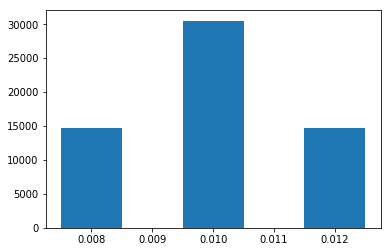

In [122]:
import numpy as np
from matplotlib import pyplot as plt
x_ax = list(time_map.keys())
y_ax = []
for i in x_ax:
    y_ax.append(time_map[i])
fig, ax = plt.subplots()
ax.bar(x_ax,y_ax,width=0.001)
x_ax, y_ax
fig.savefig('./time_interval_img/'+'0025'+'_tsDiff'+'_0403',dpi=300)

In [123]:
%%time
1

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 11.4 µs


1